In [23]:
# Import Libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Step 1: Load Cleaned Data
df = pd.read_csv("../data/cleaned_online_retail.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
# Step 2: Create Pivot Table (Customer vs Product)
pivot = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity', 
    aggfunc='sum',
    fill_value=0
)

print("Pivot table shape:", pivot.shape)
pivot.head()


Pivot table shape: (4338, 3665)


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Step 3: Apply Cosine Similarity on Items (Transposed Pivot)
item_similarity = cosine_similarity(pivot.T)

# Convert to DataFrame
item_sim_df = pd.DataFrame(item_similarity, index=pivot.columns, columns=pivot.columns)
item_sim_df.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.001548,0.000990,0.0,0.000000,0.853890,0.052085,0.021921,0.003033,...,0.0,0.0,0.0,0.0,0.0,0.038765,0.0,0.000307,0.0,0.074260
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.004958,0.020646,0.011878,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000006,0.0,0.000000
10120,0.001548,0.0,1.000000,0.004903,0.0,0.000000,0.001600,0.042543,0.010420,0.009962,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.007643,0.0,0.000331
10123C,0.000990,0.0,0.004903,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.491784,0.001099,0.014967,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [5]:
# Step 4: Map StockCode → Product Description
# Create product name mapping
product_map = df.groupby('StockCode')['Description'].first().to_dict()


In [6]:
# Step 5: Define Recommendation Function
def get_similar_products(stock_code, top_n=5):
    if stock_code not in item_sim_df.index:
        return f" Product Code {stock_code} not found."
    
    # Get similarity scores
    similar_scores = item_sim_df[stock_code].sort_values(ascending=False)[1:top_n+1]
    
    # Return product names using mapping
    recommendations = [(code, product_map.get(code, "Unknown")) for code in similar_scores.index]
    return recommendations


In [8]:
# Step 6: Trying an Example
# Pick a random popular product to test
popular_product = df['StockCode'].value_counts().index[0]

print("Product Code:", popular_product)
print("Product Name:", product_map[popular_product])

# Get 5 similar products
recs = get_similar_products(popular_product)
print("\nTop 5 similar products:")
for i, (code, name) in enumerate(recs, 1):
    print(f"{i}. [{code}] {name}")


Product Code: 85123A
Product Name: WHITE HANGING HEART T-LIGHT HOLDER

Top 5 similar products:
1. [21175] GIN + TONIC DIET METAL SIGN
2. [21733] RED HANGING HEART T-LIGHT HOLDER
3. [82552] WASHROOM METAL SIGN
4. [82551] LAUNDRY 15C METAL SIGN
5. [23288] GREEN VINTAGE SPOT BEAKER


In [9]:
# Step 7: Save Model Artifacts for Streamlit
import joblib

# Save similarity matrix and product mapping
joblib.dump(item_sim_df, '../models/item_similarity_matrix.pkl')
joblib.dump(product_map, '../models/product_code_map.pkl')

print("Item similarity model and product map saved!")


Item similarity model and product map saved!


In [10]:
# Searching By Product Name Instead of StockCode (Making it more user-friendly by letting users input a product name and return similar products.)
def get_stockcode_from_name(name_query):
    matches = {code: name for code, name in product_map.items() if name_query.lower() in name.lower()}
    return matches

# Example usage
query = "heart t-light"
matches = get_stockcode_from_name(query)

print("Matching Products:")
for code, name in matches.items():
    print(f"[{code}] {name}")


Matching Products:
[21313] GLASS HEART T-LIGHT HOLDER 
[21733] RED HANGING HEART T-LIGHT HOLDER
[21814] HEART T-LIGHT HOLDER 
[23087] ZINC  HEART T-LIGHT HOLDER
[23273] HEART T-LIGHT HOLDER WILLIE WINKIE
[35968] FOLK ART METAL HEART T-LIGHT HOLDER
[85038] 6 CHOCOLATE LOVE HEART T-LIGHTS
[85118] HEART T-LIGHT HOLDER
[85123A] WHITE HANGING HEART T-LIGHT HOLDER


In [11]:
get_similar_products("85123A")


[('21175', 'GIN + TONIC DIET METAL SIGN'),
 ('21733', 'RED HANGING HEART T-LIGHT HOLDER'),
 ('82552', 'WASHROOM METAL SIGN'),
 ('82551', 'LAUNDRY 15C METAL SIGN'),
 ('23288', 'GREEN VINTAGE SPOT BEAKER')]

In [19]:
# Filter Recommendations by Country or Time Window (Useful for personalization, e.g., UK customers only or recent time frame)
# Step A: Filter by Country (e.g., United Kingdom)
# Filter for United Kingdom only
df_uk = df[df['Country'] == 'United Kingdom'].copy()

# Check basic info
print("Total transactions in UK:", df_uk.shape[0])
df_uk.head()


Total transactions in UK: 354321


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# Step B: Filter by Time Window (e.g., last 6 months)
# Convert InvoiceDate to datetime if not already
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

# Filter by recent 6-months window
latest_date = df_uk['InvoiceDate'].max()
cutoff_date = latest_date - pd.DateOffset(months=6)

df_recent_uk = df_uk[df_uk['InvoiceDate'] >= cutoff_date].copy()
print("Transactions in last 6 months (UK):", df_recent_uk.shape[0])
df_recent_uk.head()


Transactions in last 6 months (UK): 216984


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
153937,556202,22194,BLACK DINER WALL CLOCK,1,2023-06-09 13:08:00,8.50,14606.0,United Kingdom,8.50
153938,556202,85114C,RED ENCHANTED FOREST PLACEMAT,6,2023-06-09 13:08:00,1.65,14606.0,United Kingdom,9.90
153939,556202,21846,PINK DIAMANTE PEN IN GIFT BOX,1,2023-06-09 13:08:00,4.95,14606.0,United Kingdom,4.95
153940,556202,21210,SET OF 72 RETROSPOT PAPER DOILIES,1,2023-06-09 13:08:00,1.45,14606.0,United Kingdom,1.45
153941,556202,21080,SET/20 RED RETROSPOT PAPER NAPKINS,1,2023-06-09 13:08:00,0.85,14606.0,United Kingdom,0.85


In [21]:
# Step C: Create Pivot Table and Similarity Matrix (Filtered Data)
pivot_recent_uk = df_recent_uk.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Apply cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

item_sim_recent_uk = cosine_similarity(pivot_recent_uk.T)
item_sim_recent_uk_df = pd.DataFrame(item_sim_recent_uk, index=pivot_recent_uk.columns, columns=pivot_recent_uk.columns)


In [22]:
# Step D: Recommendation Function Based on Filtered Data
def get_similar_products_recent_uk(stock_code, top_n=5):
    if stock_code not in item_sim_recent_uk_df.index:
        return f"Product Code {stock_code} not found in recent UK data."
    
    similar_scores = item_sim_recent_uk_df[stock_code].sort_values(ascending=False)[1:top_n+1]
    recommendations = [(code, product_map.get(code, "Unknown")) for code in similar_scores.index]
    return recommendations


C:\Users\tanus\AppData\Local\Temp\ipykernel_25228\403258171.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tanus\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


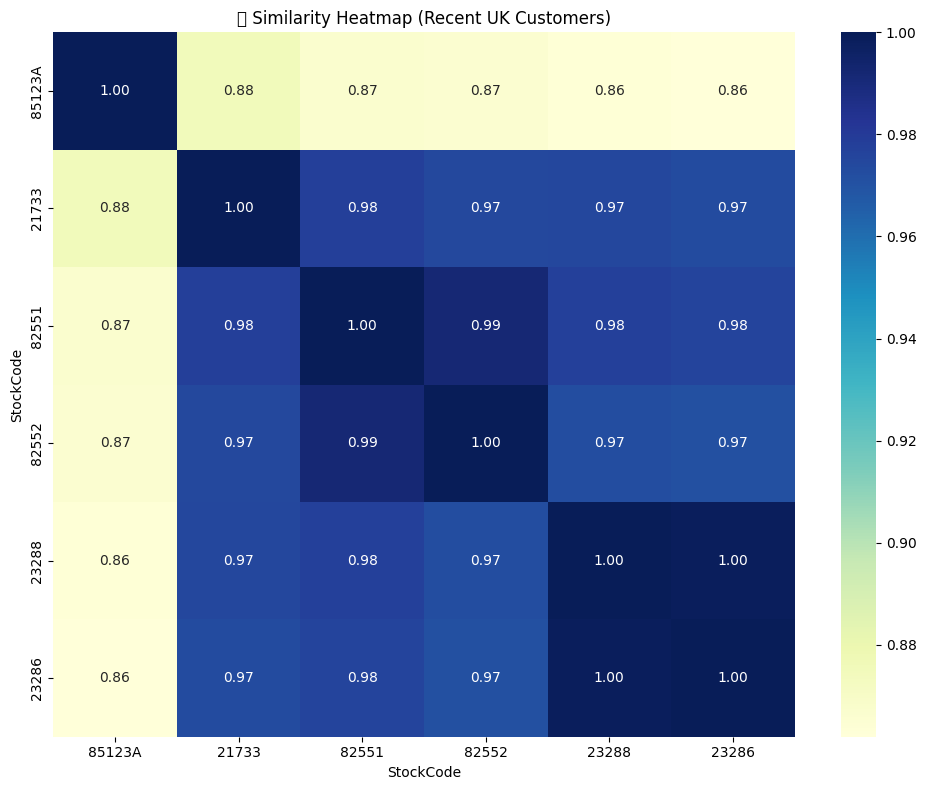

In [24]:
# Step E:Visualize Top-N Product Similarity (Example with top 5 similar items)
# Use previous popular product as base
popular_product = '85123A'
recs_recent = get_similar_products_recent_uk(popular_product)

# Combine base + recommended codes
top_codes = [popular_product] + [code for code, _ in recs_recent]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(item_sim_recent_uk_df.loc[top_codes, top_codes], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔍 Similarity Heatmap (Recent UK Customers)")
plt.tight_layout()
plt.show()


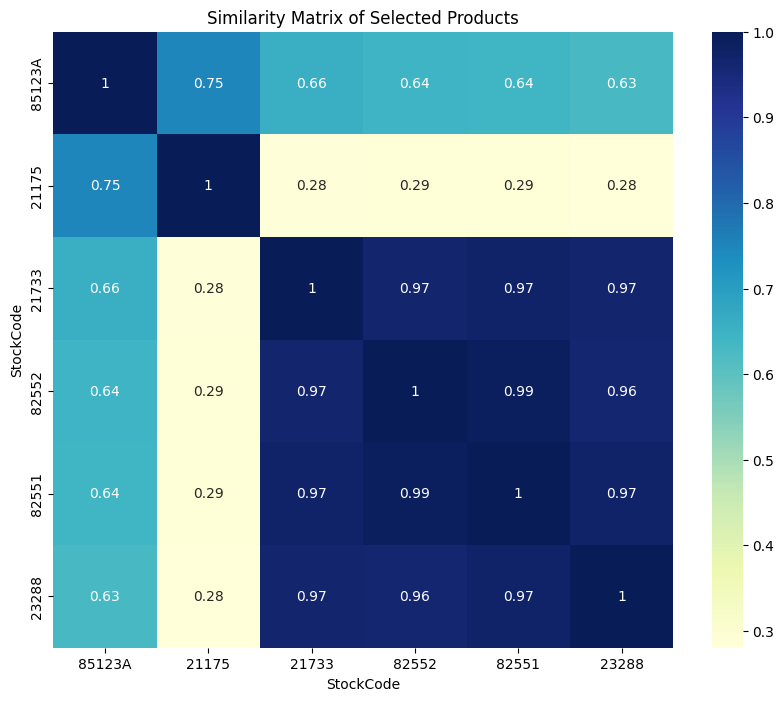

In [25]:
# Visualize Item Similarity as a Heatmap (Useful for internal model validation.)
import seaborn as sns
plt.figure(figsize=(10, 8))
top_codes = [popular_product] + [code for code, _ in recs]
sns.heatmap(item_sim_df.loc[top_codes, top_codes], annot=True, cmap='YlGnBu')
plt.title("Similarity Matrix of Selected Products")
plt.show()


In [26]:
'''
*  Summary:

### Advanced Recommendation Features

1.  Filtered data to only include:
    - UK customers
    - Last 6 months of transactions

2. Recomputed product similarity matrix on filtered dataset

3. Defined a new recommendation function using personalized segment

4. Visualized item-item similarity heatmap for better model interpretability

-> These enhancements allow your recommender system to be **context-aware**, enabling:
    - Localized product suggestions
    - Seasonal promotions
    - More relevant recommendations

-: These advanced features can be toggled dynamically in our Streamlit app later.

'''

'\n*  Summary:\n\n### Advanced Recommendation Features\n\n1.  Filtered data to only include:\n    - UK customers\n    - Last 6 months of transactions\n\n2. Recomputed product similarity matrix on filtered dataset\n\n3. Defined a new recommendation function using personalized segment\n\n4. Visualized item-item similarity heatmap for better model interpretability\n\n-> These enhancements allow your recommender system to be **context-aware**, enabling:\n    - Localized product suggestions\n    - Seasonal promotions\n    - More relevant recommendations\n\n-: These advanced features can be toggled dynamically in our Streamlit app later.\n\n'